In [36]:
from sklearn import tree
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.ensemble import RandomTreesEmbedding
from sklearn.decomposition import TruncatedSVD

In [46]:
# generate blobs, circles and moons

n_sample = 200

sample_blobs, label_blobs = datasets.make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=[0.5, 1, 1], 
                   center_box=(-10.0, 10.0), shuffle=False, random_state=0)
sample_circles, label_circles = datasets.make_circles(n_samples=n_sample, factor=.5, noise=.05, random_state=1, shuffle=False)
sample_moons, label_moons = datasets.make_moons(n_samples=n_sample, noise=.05, random_state=0, shuffle=False)

# generate bars
sample_bars, label_bars = datasets.make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=1, 
                   center_box=(-12.0, 12.0), shuffle=False, random_state=40)
trans = [[0.6, -0.6], [-0.4, 0.8]]
sample_bars = np.dot(sample_bars, trans)

# organize the datasets
data = [(sample_blobs, label_blobs), 
       (sample_circles, label_circles), 
       (sample_moons, label_moons), 
       (sample_bars, label_bars)]

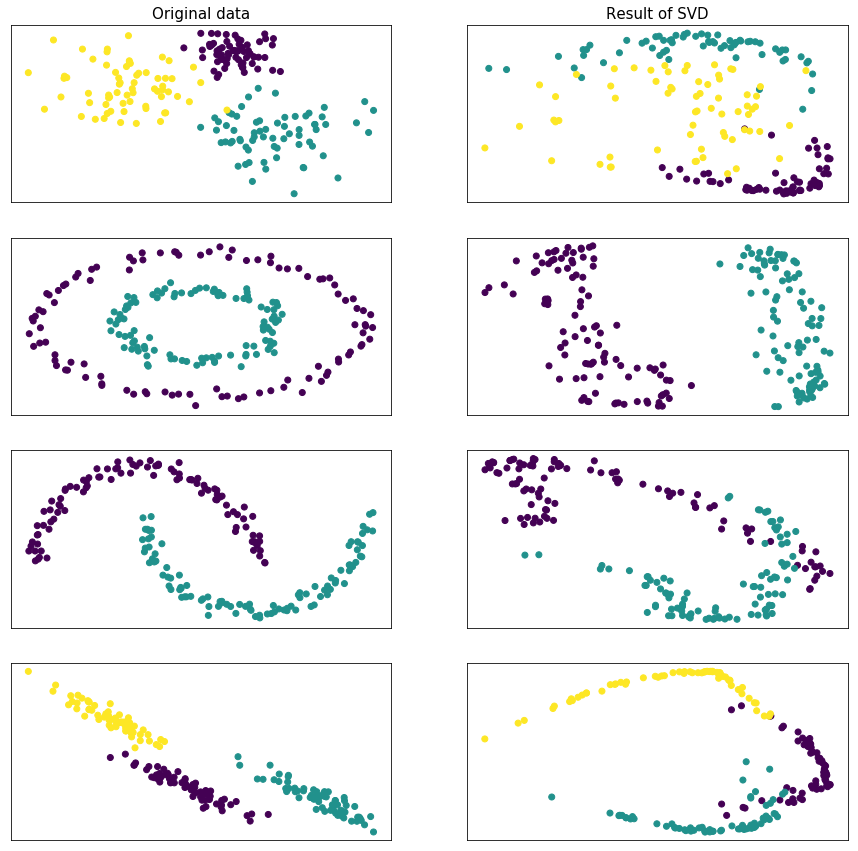

In [49]:
plt.figure(figsize=(15, 15))

cmap = plt.get_cmap('viridis')
colors = np.array([cmap(i) for i in np.linspace(0, 1, 3)])

for i, (samples, labels, params) in enumerate(data): 
    
    # transform data to a higher dimension using 
    clf = RandomTreesEmbedding(n_estimators=200, random_state=0, max_depth=3)
    X = clf.fit_transform(samples)

    # apply dimensional reduction on the high dimension data 
    svd = TruncatedSVD(n_components=2)
    X_svd = svd.fit_transform(X)
    
    plt.subplot(4, 2, i*2+1)
    plt.scatter(samples[:, 0], samples[:, 1], color=colors[labels])
    if i == 0:
        plt.title('Original data', fontsize=15)
    plt.xticks(())
    plt.yticks(())
    
    plt.subplot(4, 2, i*2+2)
    plt.scatter(X_svd[:, 0], X_svd[:, 1], color=colors[labels])
    if i == 0:
        plt.title('Result of SVD', fontsize=15)
    plt.xticks(())
    plt.yticks(())
    
#    plt.subplot(4, 3, i*3+3)
#    plt.scatter(X_svd[:, 0], X_svd[:, 1], color=colors[pred])
#    if i == 0:
#        plt.title('Result of clustering', fontsize=15)
#    plt.xticks(())
#    plt.yticks(())
#    plt.text(0.99, 0.01, 'ARI='+str(round(score, 3)), 
#             transform=plt.gca().transAxes, size=15, horizontalalignment='right')